![SPY Monthly Chart](SPY.png)

# **About Dataset**

## **What is SPY?**

The SPDR S&P 500 ETF Trust (SPY) is a widely traded exchange-traded fund (ETF) that aims to track the performance of the Standard & Poor's 500 Index, one of the most renowned benchmarks for the U.S. equity market. Investors commonly use SPY as a means to gain exposure to a broad portfolio of large-cap U.S. stocks, reflecting the overall health and trends of the stock market. As an ETF, SPY provides a cost-effective and liquid way for market participants to participate in the movements of the S&P 500. Traders and analysts often analyze historical price data, technical indicators, and various quantitative models to make informed predictions about the future price movements of SPY, contributing to the broader landscape of financial research and forecasting.

## **Data Description**
This dataset provides the history of daily prices of SPY Stock (SPY). All the column descriptions are provided. Currency is USD. Data Directly loaded from [Yahoo Finance](https://finance.yahoo.com/).
### <font color='red'> **Declaration** </font>
This notebook is not intended for making buy and sell decisions. It is solely designed for the purpose of data analysis study. Any insights or findings presented in this notebook should not be considered as financial advice, and users are strongly advised to conduct their own research or consult with a financial professional before making any investment decisions.


<div style="text-align: center;">
    <table align="center">
        <tr>
            <th><b>Attribute</b></th>
            <th><b>Details</b></th>
        </tr>
        <tr>
            <td><b>Author</b></td>
            <td><b>Muhammad Nauman Sair</b></td>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/mnsair"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/muhammad-nauman-sair/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
            <td>Twitter</td>
            <td><a href="https://twitter.com/NaumanSair"><img src="https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter" alt="Twitter"/></a></td>
        </tr>
        <tr>
            <td>Kaggle</td>
            <td><a href="https://www.kaggle.com/muhammadnaumansair"><img src="https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle" alt="Kaggle"/></a></td>
        </tr>
        <tr>
            <td>Outlook</td>
            <td><a href="mailto:NaumanSair@outlook.com"><img src="https://img.shields.io/badge/Outlook-Contact%20Me-red?style=for-the-badge&logo=outlook" alt="Outlook"/></a></td>
        </tr>
    </table>
</div>


In [70]:
# Import Libraries
import numpy as np
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime, timedelta
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

## Importing SPY Historical Data where the end date is Last Trading Date.

In [71]:
# Import Live data from Yahoo Finance and save it in a csv file
# Replace 'SPY' with the ticker of your choice

# Define the ticker symbol for SPY
ticker_symbol = "SPY"

# Set the start date for the data
start_date = "2019-01-31"

# Set the end date to today's date
# end_date = datetime.today().strftime('%Y-%m-%d') #this will pull the data one day less than last trading day.
# end_date = "2024-02-01" # Use this line if you want to get data till specific date

# Calculate the end date as the current date plus one day, this is to ensure that we get data for the current day too.
end_date = (datetime.now() + timedelta(days=1)).strftime("%Y-%m-%d")

# # Use yfinance to get the historical data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

#save the data in a csv file
# df.to_csv('SPY.csv')

# Read the data from the csv file
df = pd.read_csv('SPY.csv')


# Display the first few rows
print("First few rows:")
print(df.head())

# Display the last few rows
print("\nLast few rows:")
print(df.tail())


[*********************100%%**********************]  1 of 1 completed

First few rows:
         Date        Open        High         Low       Close   Adj Close  \
0  2019-01-31  267.510010  270.470001  267.269989  269.929993  248.758392   
1  2019-02-01  270.149994  271.200012  269.179993  270.059998  248.878174   
2  2019-02-04  270.109985  272.029999  269.359985  271.959991  250.629211   
3  2019-02-05  272.440002  273.440002  271.880005  273.100006  251.679718   
4  2019-02-06  272.790009  273.339996  271.920013  272.739990  251.348007   

      Volume  
0  104012100  
1   85782500  
2   60744800  
3   79552800  
4   58347800  

Last few rows:
            Date        Open        High         Low       Close   Adj Close  \
1254  2024-01-25  487.579987  488.309998  485.390015  488.029999  488.029999   
1255  2024-01-26  487.589996  489.119995  486.540009  487.410004  487.410004   
1256  2024-01-29  487.730011  491.420013  487.170013  491.269989  491.269989   
1257  2024-01-30  490.559998  491.619995  490.109985  490.890015  490.890015   
1258  2024-01-3

In [72]:
df.shape

(1259, 7)

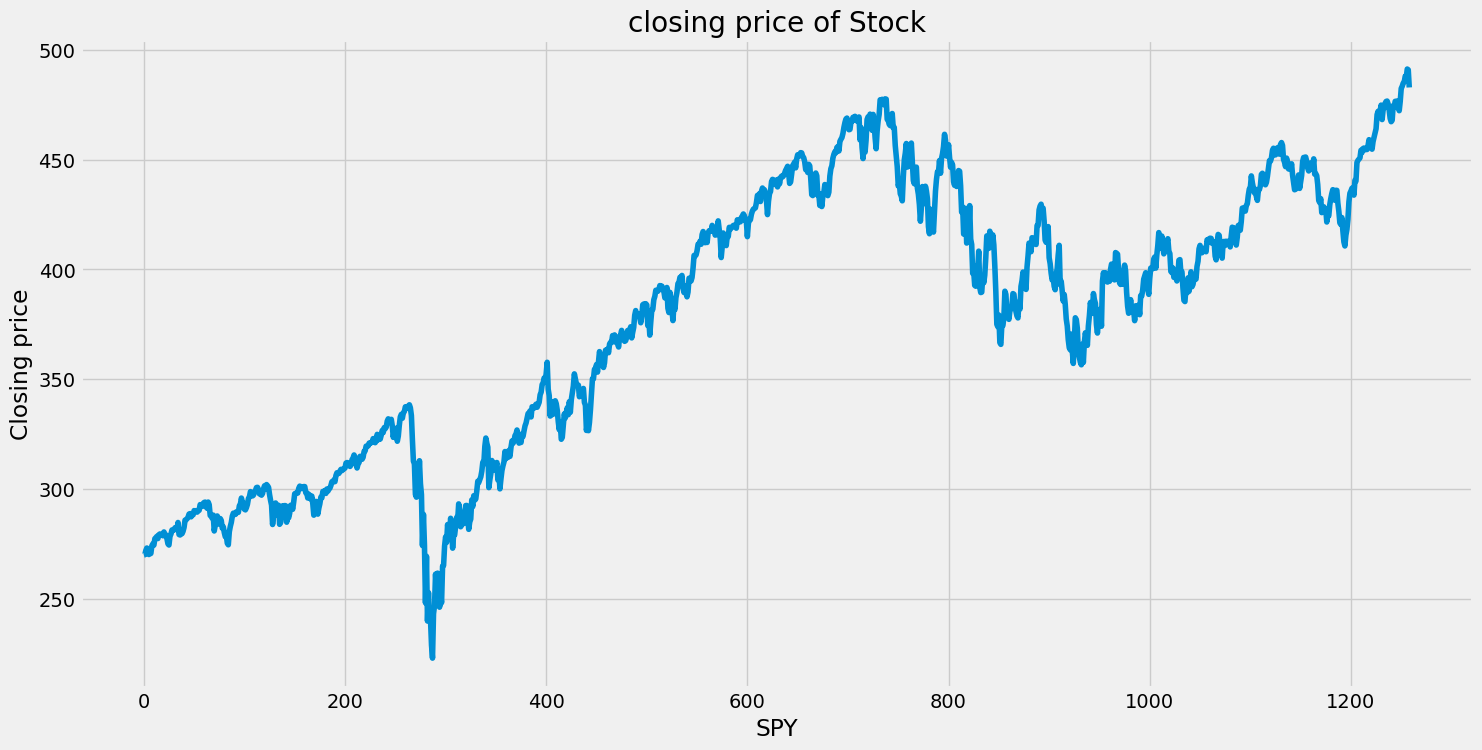

In [73]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('SPY')
plt.ylabel('Closing price')
plt.show()

In [74]:
#create new database with only required coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1008

In [75]:
#scale the data
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  4.0634691798830194e-16
Standard deviation of processed data:  0.9999999999999999


In [76]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [77]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(948, 60, 1)

In [78]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (948, 60, 1)
x_train shape after reshaping (948, 60, 1)


## Long Short-Term Memory (LSTM) Model:
LSTM is a type of recurrent neural network (RNN) architecture designed to overcome the limitations of traditional RNNs in capturing and learning long-term dependencies in sequential data. It is particularly effective for tasks involving time series data, natural language processing, and other sequential data applications.

In [79]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1)) 

In [80]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 200)           161600    
                                                                 
 lstm_7 (LSTM)               (None, 200)               320800    
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 507601 (1.94 MB)
Trainable params: 507601 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
#train the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
30/30 [==============================] - 8s 219ms/step - loss: 0.0787
Epoch 2/5
30/30 [==============================] - 6s 217ms/step - loss: 0.0188
Epoch 3/5
30/30 [==============================] - 7s 221ms/step - loss: 0.0167
Epoch 4/5
30/30 [==============================] - 6s 216ms/step - loss: 0.0143
Epoch 5/5
30/30 [==============================] - 7s 223ms/step - loss: 0.0147


In [83]:
# Evaluate the model
loss = model.evaluate(x_train, y_train)
print("Loss:", loss)

#Print accuracy score of the model
accuracy = 1 - loss
print("Accuracy:", accuracy)




30/30 [==============================] - 1s 34ms/step - loss: 0.0127
Loss: 0.012694429606199265
Accuracy: 0.9873055703938007


In [84]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [85]:
#convert the data to numpy 
x_test=np.array(x_test)

In [86]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [87]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

8/8 [==============================] - 1s 31ms/step
[[404.73062]
 [406.5649 ]
 [409.4798 ]
 [411.73065]
 [412.83325]
 [414.05127]
 [414.34607]
 [413.48404]
 [412.29514]
 [411.92752]
 [412.01004]
 [412.54208]
 [412.25653]
 [411.41568]
 [409.02182]
 [406.09998]
 [403.73807]
 [401.32236]
 [399.5152 ]
 [398.08463]
 [396.84293]
 [396.45584]
 [397.7044 ]
 [399.6801 ]
 [400.67508]
 [401.1214 ]
 [399.9432 ]
 [397.11816]
 [393.7756 ]
 [391.79834]
 [390.42996]
 [390.79532]
 [390.96164]
 [391.6639 ]
 [393.44025]
 [394.3284 ]
 [394.79834]
 [395.41782]
 [396.1389 ]
 [396.63712]
 [397.9216 ]
 [399.80624]
 [402.66937]
 [405.84146]
 [408.26624]
 [409.71155]
 [410.6597 ]
 [411.2413 ]
 [411.53104]
 [411.31348]
 [411.7681 ]
 [412.31592]
 [413.06638]
 [413.8417 ]
 [414.4888 ]
 [414.57648]
 [414.4059 ]
 [414.196  ]
 [412.8804 ]
 [410.89676]
 [410.25528]
 [411.0264 ]
 [412.35318]
 [412.97675]
 [412.65967]
 [411.4092 ]
 [411.14987]
 [411.47324]
 [411.74622]
 [412.2802 ]
 [412.7464 ]
 [413.0122 ]
 [413.37186]

In [88]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

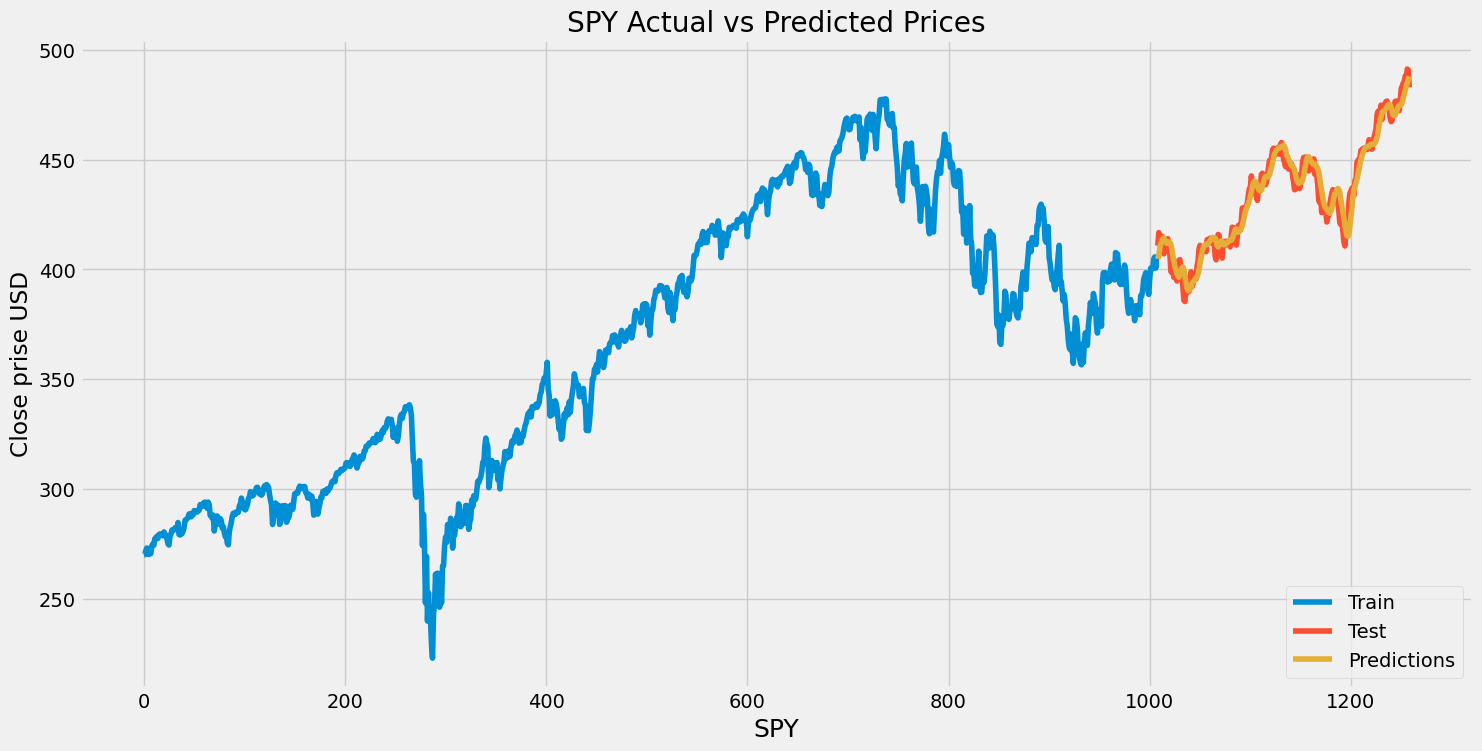

In [89]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('SPY Actual vs Predicted Prices')
plt.xlabel('SPY', fontsize=18)
plt.ylabel('Close prise USD')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

In [90]:
#show the valid and predicted value
valid

,Close,Predictions
1008,410.799988,404.730621
1009,416.779999,406.564911
1010,412.350006,409.479797
1011,409.829987,411.730652
1012,415.190002,412.833252
...,...,...
1254,488.029999,481.679749
1255,487.410004,483.521362
1256,491.269989,484.980774
1257,490.890015,486.583801


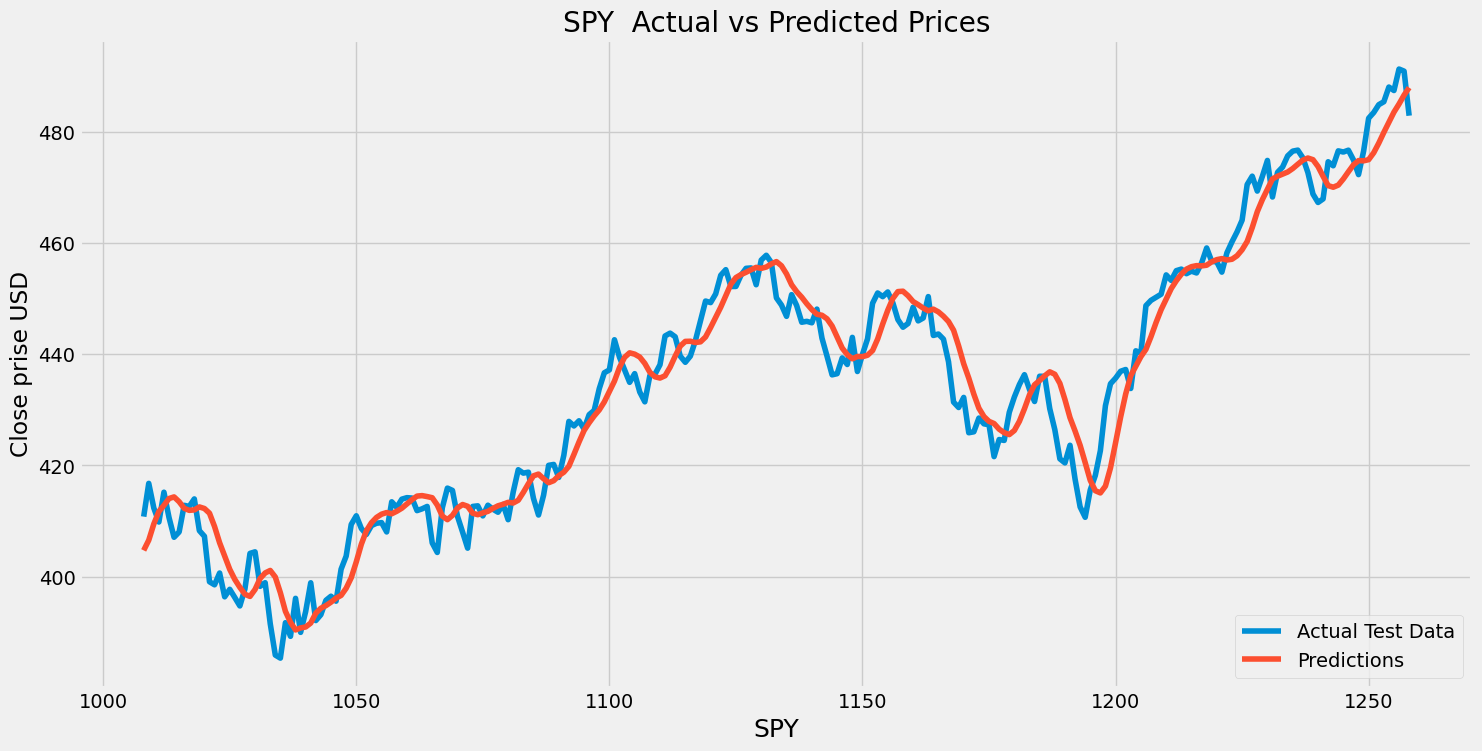

In [91]:
# Plot only the predicted values vs test data
plt.figure(figsize=(16,8))
plt.title('SPY  Actual vs Predicted Prices')
plt.xlabel('SPY', fontsize=18)
plt.ylabel('Close prise USD')
plt.plot(valid[['Close','Predictions']])
plt.legend(['Actual Test Data','Predictions'],loc='lower right')
plt.show()

In [92]:
# Code to predict the next 10 days' closing price.
# Get the last 200 days of data
last_200_days = scaled_data[-200:]

# Reshape the data
last_200_days = np.reshape(last_200_days, (1, last_200_days.shape[0], 1))

# Predict the next 10 days' closing price
predicted_prices = []
for _ in range(10):
    next_price = model.predict(last_200_days)
    predicted_prices.append(next_price[0][0])
    
    # Reshape the predicted price to match the input shape of the model
    next_price = np.reshape(next_price, (1, 1, 1))
    
    # Update the last 200 days' data with the predicted price
    last_200_days = np.append(last_200_days[:, 1:, :], next_price, axis=1)

# Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform([predicted_prices])

# Print the predicted prices
print("Predicted prices for the next 10 days:")
print(predicted_prices)


1/1 [==============================] - 0s 24ms/step
Predicted prices for the next 10 days:
[[487.66950923 487.32228139 486.91318003 486.45849079 485.97162673
  485.46463937 484.94818134 484.43146897 483.92210272 483.42623928]]
